<a href="https://colab.research.google.com/github/manisha-dhanuka/Linear-Regression/blob/main/Yes_Bank_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - YES Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# Project Summary:
Analysed the Stock Prices. First explored the data using various visualisation libraries like matplotlib, seaborn. Further removed the highly correlated features. The time series was further decomposed to understand the Trend, Seasonality and residual component. There was overall increasing trend with presence of seasonality,but the slope turned down after the caes on Rana Kapoor, thus confirming that the case has affected the proice of stocks. 
Also, used confidence interval & Isolation Forest to find the anomalies. Then we fit statistical models like double exponential smoothing & Triple exponential Smoothing for further predictions.These  models did pretty well. Lastly, we implemented a machine learning model i.e. SARIMA but it was not able to understand the pattern well. Thus conclude our predictions with Triple Exponential Smoothing with 6 month horizon. 


# Github Link: 
https://github.com/manisha-dhanuka/Linear-Regression

# Problem Statement:
Yes Bank is an Indian bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapoor in 2004.
It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. 
Since 2018, it has been in the news because of the fraud case involving Rana Kapoor, the founder. Owing to the fact, it was interested to see how that impacted the stock price of the company and whether time series models or any other predictive models can do justice to such situations. 

# About the dataset:
This dataset has monthly stock prices of the bank since its inception, and includes opening, closing, high and low prices of every month. 

## Importing Libraries:

In [1]:
#importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Activating Do not disturb mode:


In [2]:
import warnings                                  # `do not disturb` mode
warnings.filterwarnings('ignore')

## Data Loading as a pandas DataFrame:

In [3]:
#Importing the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the file from drive:
df = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")

## Data First Information:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## Look at the first 5 rows of the data:

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Feature engineering : 

In [7]:
# To convert date into date- time object
from datetime import datetime

## Converting string date column into pandas Date Time type


In [8]:
#Redefining Date and set it as index:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))
df['Date']= pd.to_datetime(df['Date'])


In [ ]:
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


The date mentioned is at the start of the month.. since, our column of interest is the Close Price which is recorded at the end of the month, Let shift the dates to the month end alongwith setting date column as the index column. 

In [9]:
#Setting Date as index:
df.set_index('Date',inplace = True)

# Changing into month end:
df = df.shift(periods = 1, freq = 'M')

# Setting frequency to month as stats library need to know the frequency of the data. 
df.index.freq ='M'

#Null Value and Duplicates consideration:

In [10]:
#Checking for the null values:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
#Checking for the duplicate values:
df.duplicated().sum()

0

In [12]:
# For saving the plots:
from google.colab import files

#Analysing the data:

# Descriptive Statistics: 

In [13]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# Univariate Analysis: 

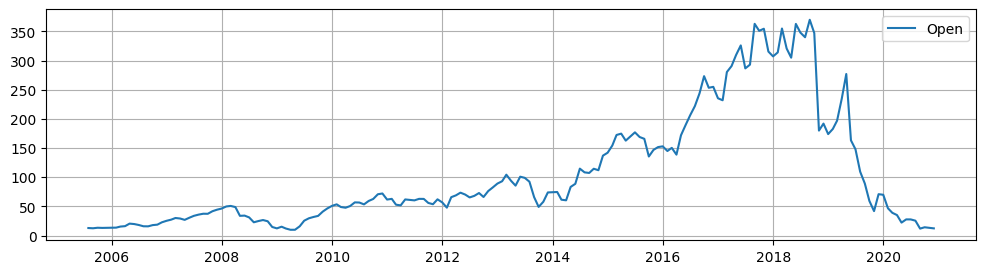

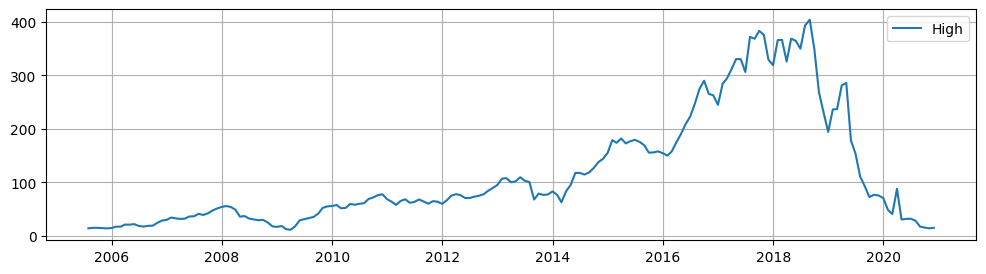

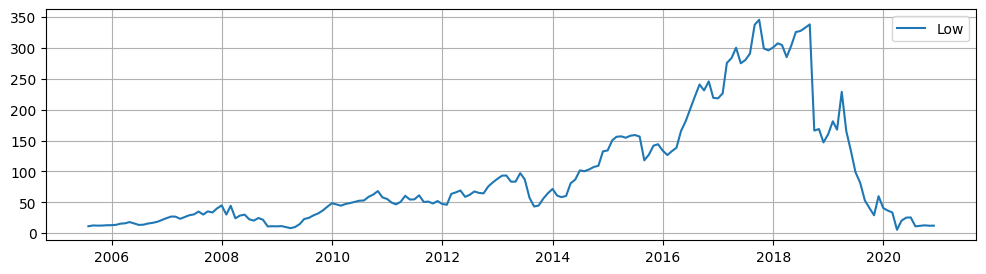

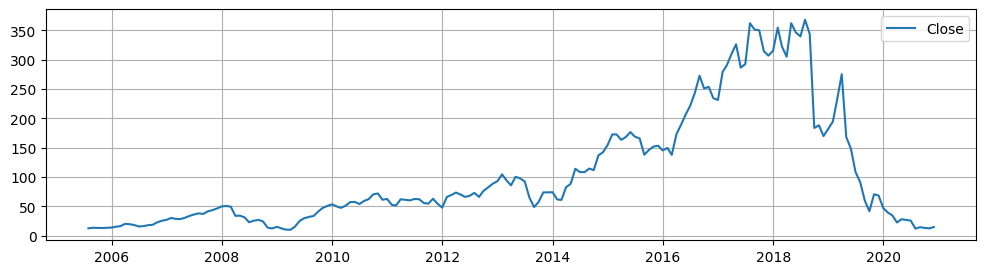

In [14]:
# Plotting the stock prices with respect to date:
for col in list(df.columns):
  fig = plt.figure(figsize=(12,3),dpi = 100)
  ax =plt.gca()
  ax.grid(True)
  ax.plot(df[col],label = col)
  ax.legend()
  plt.show()
  # plt.savefig("fig1.png")
  # files.download("fig1.png");

# Why used this Chart:
The data in hand is time series data ( time series is simply a set of data points ordered in time.Furthermore, the data is often equally spaced in time, meaning that equal intervals separate each data point.)
Best chart to display time series data is Line chart attributed to continuos nature of time. It helps in pre -analysing various components of time which we will discuss further. 

# Insights:
Overall all the four variables i.e. Open, Close, High , Low show the same trend and seasonal factors. 

# Impact:
the data in hand is monthly data. Thus similar patterns actually assure that there has not been drastic change in the stock price over a month. Thus, showing a kind of stability . A good indication. Descriptive statistics also confirmed this.


# First Look:
From the initial plots, it seems that there is an overall increasing trend , but there is a great dip in between, Also, there are some chances of cyclical behaviour being present. 

# Bivariate Analysis:

 ## Opening & Closing Price Analysis:

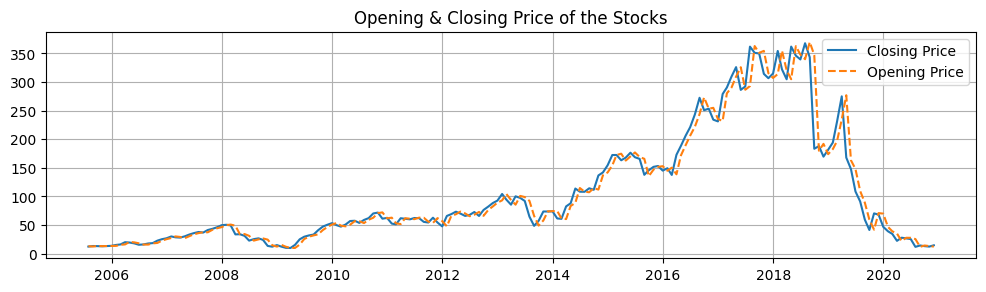

In [ ]:
# Plotting the opening and Closing price of stocks:
plt.figure(figsize=(12, 3),dpi = 100)
plt.plot(df.Close,label = "Closing Price")
plt.plot(df.Open, label = "Opening Price",ls= '--')
plt.title('Opening & Closing Price of the Stocks')
plt.legend()
plt.grid(True)
# plt.savefig("price.png")
# files.download("price.png");
plt.show()

In [14]:
# Difference between the opening and closing Price:
df['Open_Close']= df['Close']- df['Open']
# diff.index = df.index


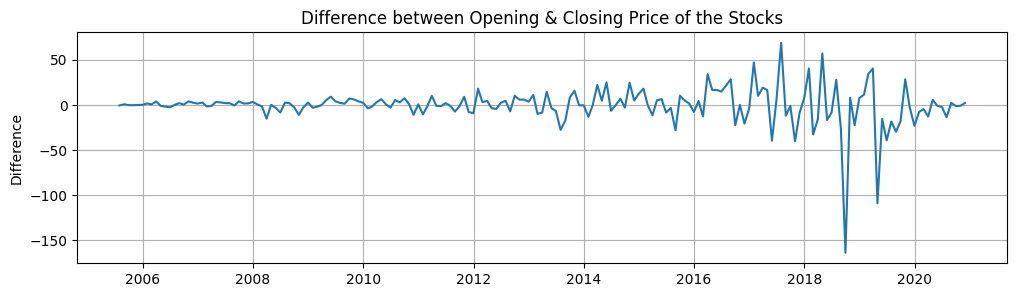

In [15]:
plt.figure(figsize=(12,3),dpi = 100)
plt.plot(df['Open_Close'])
plt.title('Difference between Opening & Closing Price of the Stocks')
plt.ylabel("Difference")
plt.grid(True)

In [16]:
df['Open_Close'].describe()

count    185.000000
mean      -0.336703
std       20.725837
min     -163.750000
25%       -4.140000
50%        0.550000
75%        5.440000
max       68.920000
Name: Open_Close, dtype: float64

In [17]:
df['Open_Close'].idxmax()

Timestamp('2017-07-31 00:00:00', freq='M')

In [18]:
df['Open_Close'].idxmin()

Timestamp('2018-09-30 00:00:00', freq='M')

# Observations:  
Analysing the opening and Closing Price of the stocks, it seems that there is not much difference between the prices ( Deviation of 20 INR) . But there is considerable difference in September, 2018 indicating some incident that abruptly decrease the price i.e. by 163 INR in the month. 

# Assumption 1: Is Closing Price of nth month related to the opening price of n+1th month:

In [19]:
# Finding the correlation between both these two:
np.corrcoef(np.array(df['Close'], df['Open'].shift(-1)))

1.0

# Observation:
The coefficient +1 shows that yes both are completely related to each other.

# High & Low Price Analysis:

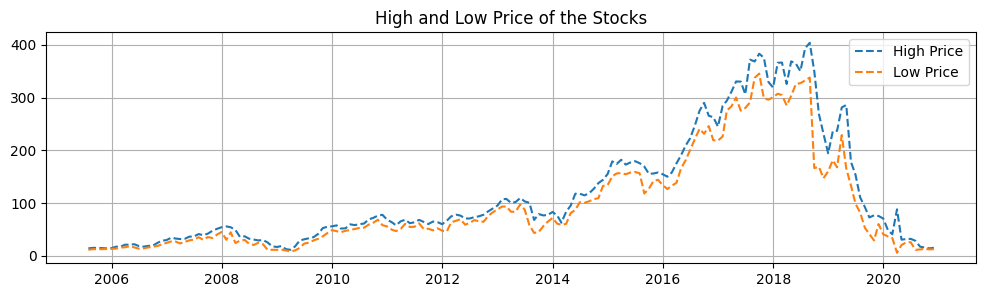

In [20]:
#Analysing the high and low price of the stocks: 
plt.figure(figsize=(12, 3),dpi = 100)
plt.plot(df.High, label = "High Price",ls ='--')
plt.plot(df.Low, label = 'Low Price',ls = '--')
plt.title('High and Low Price of the Stocks')
plt.legend()
plt.grid(True)
# plt.savefig("price.png")
# files.download("price.png");
plt.show()

In [21]:
df['high_low']= df['High']- df['Low']

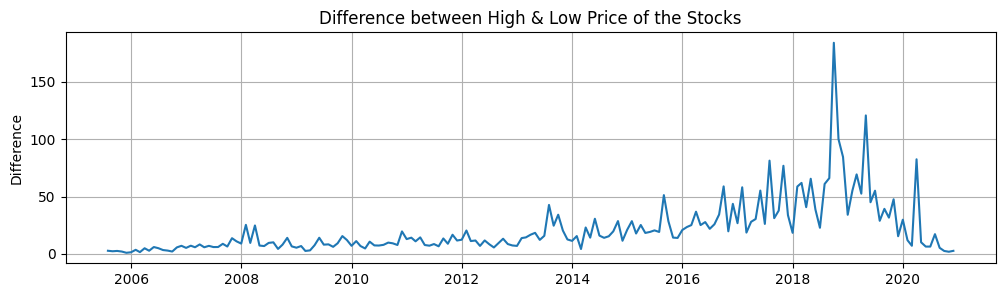

In [23]:
plt.figure(figsize=(12,3),dpi = 100)
plt.plot(df['high_low'])
plt.title('Difference between High & Low Price of the Stocks')
plt.ylabel("Difference")
plt.grid(True)

In [24]:
df.describe()

,Open,High,Low,Close,Open_Close,high_low
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703,-0.336703,21.156486
std,98.879850,106.333497,91.219415,98.583153,20.725837,23.452871
min,10.000000,11.240000,5.550000,9.980000,-163.750000,1.000000
25%,33.800000,36.140000,28.510000,33.450000,-4.140000,7.100000
50%,62.980000,72.550000,58.000000,62.540000,0.550000,13.450000
75%,153.000000,169.190000,138.350000,153.300000,5.440000,25.830000
max,369.950000,404.000000,345.500000,367.900000,68.920000,183.850000


In [25]:
df['high_low'].idxmax()

Timestamp('2018-09-30 00:00:00', freq='M')

In [26]:
df.to_csv('intermediate.csv')

# Observations: 
Also, the difference between high and low prices of the September, 2018 is nearly 183 INR, which further strengthens our intution. 

#Candlestick Chart Analysing the prices of stock:

In [27]:
# Up dataframes contain the entries where Closing price is more than or equals to  the opening price:
up = df[df.Close >= df.Open]

# Down dataframes contain the entries where Closing price is less than the opening price:
down = df[df.Close < df.Open]

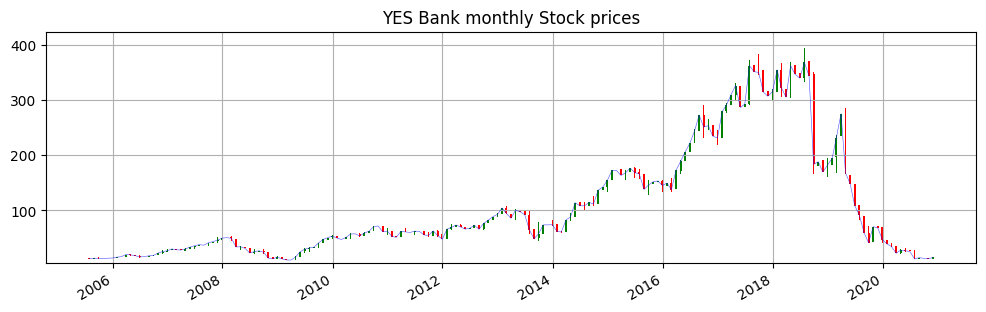

In [28]:
# Using barplot to create the candlestick graph:
plt.figure(figsize = (12,3), dpi = 100)
plt.bar(x = up.index, height = up.Close- up.Open , width = 12.5, bottom = up.Open, color = 'green')
plt.bar(x = up.index, height = up.High- up.Close , width = 2.5, bottom = up.Close, color = 'green')
plt.bar(x = up.index, height = up.Open-up.Low  , width = 2.5, bottom = up.Low, color = 'green')

plt.bar(x= down.index, height = down.Open - down.Close, width = 12.5, bottom = down.Close, color = 'red')
plt.bar(x= down.index, height = down.High - down.Open, width = 2.5, bottom = down.Open, color = 'red')
plt.bar(x= down.index, height = down.Close-down.Low, width = 2.5, bottom = down.Low, color = 'red')
plt.xticks(rotation=30, ha='right')
plt.title('YES Bank monthly Stock prices')
plt.plot(df.Close, color= 'blue',alpha= 0.7,lw = .4)

plt.grid(True)
plt.show()

#Bivariate collinearity:

In [31]:
# Checking the correlation :
correlation = df[['Open','Close','High','Low']].corr()

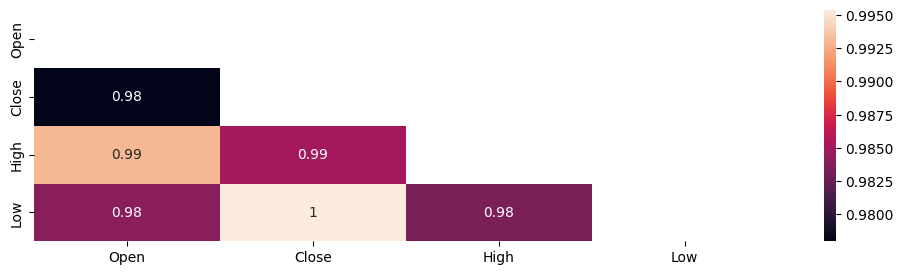

In [32]:
# Plotting Heatmap for visualisation:
plt.figure(figsize = (12,3),dpi = 100)
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation, annot = True,mask = mask)
plt.show()
# plt.savefig("corr.png")
# files.download("corr.png");

# Multicollinearity:

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# VIF dataframe
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns[:-1]
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]-1)]

    return(vif)


In [35]:
print(calc_vif(df[['Open','Close','High','Low']]))

  variables         VIF
0      Open  288.504853
1     Close  428.401649
2      High  323.952468


# Observation:
Clearly, there is a high multivariate collinearity too. Dropping other columns except Close, which is our target variable.

In [15]:
stock_df = pd.DataFrame(df['Close'])

In [16]:
stock_df.to_csv('final_data.csv')

In [38]:
stock_df.head()

,Close
Date,
2005-07-31,12.46
2005-08-31,13.42
2005-09-30,13.30
2005-10-31,12.99
2005-11-30,13.41


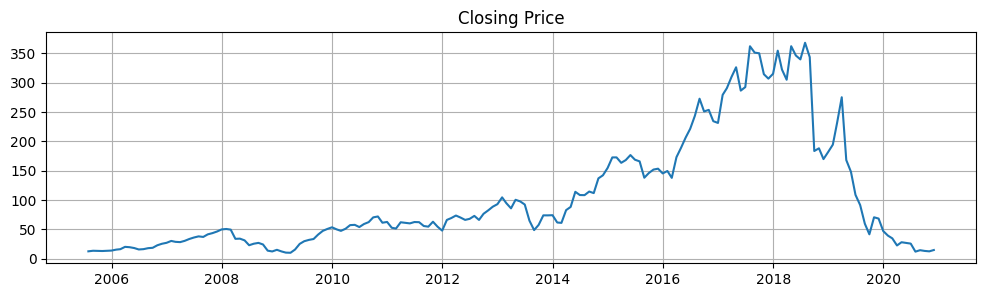

In [39]:
plt.figure(dpi = 100,figsize= (12,3))
plt.plot(stock_df)
plt.title('Closing Price')
plt.grid(True);


# Target Analysis:

# ETS Decomposition

**Time series decomposition** is a process by which we separate a time series into its components: trend, seasonality, and residuals.

**Trend**: 
The trend represents the slow-moving changes in a time series. It is responsible for making the series gradually increase or decrease over time.

**Seasonality:**
The seasonality component represents the seasonal pattern in the series. The cycles occur repeatedly over a fixed period of time.

**Residuals:**
The residuals represent the behavior that cannot be explained by the trend and seasonality components. They correspond to random errors, also termed white noise.

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# using multiplicative model, since the rise seems exponential 
result = seasonal_decompose(stock_df,model = 'multiplicative')


Text(0.5, 1.0, 'Trend of the data')

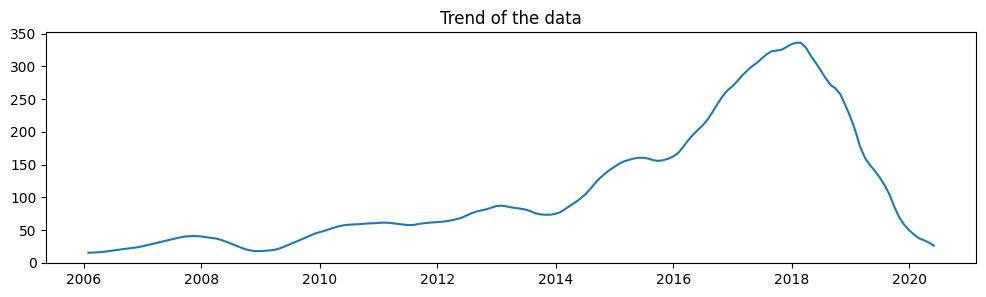

In [42]:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.trend)
plt.title('Trend of the data')
# plt.savefig("ets_trend.png")
# files.download("ets_trend.png");


Text(0.5, 1.0, 'Seasonality in the data')

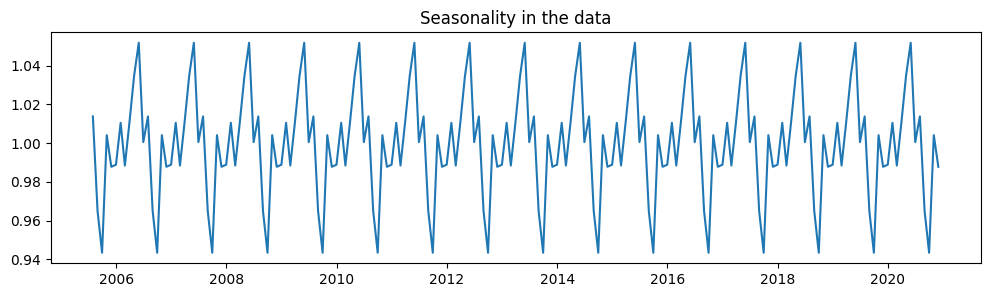

In [43]:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.seasonal)

plt.title('Seasonality in the data')
# plt.savefig("ets_seasonal.png")
# files.download("ets_seasonal.png");


Text(0.5, 1.0, 'Seasonality in the data')

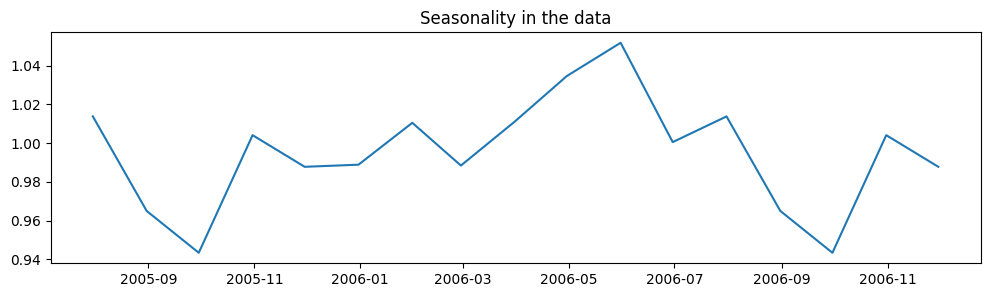

In [44]:
# Zooming the plot:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.seasonal[:17])

plt.title('Seasonality in the data')

Text(0.5, 1.0, 'Residuals')

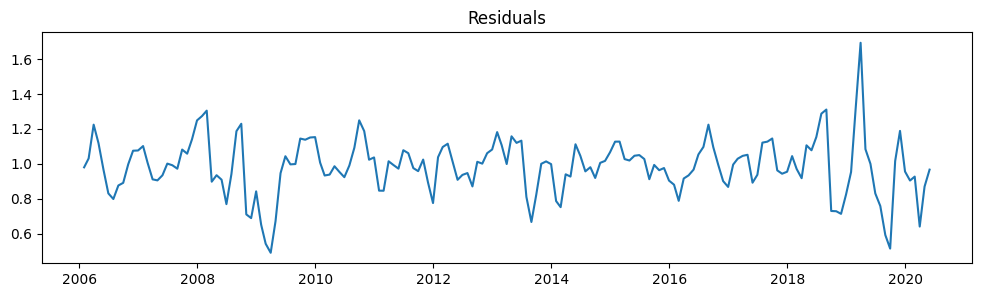

In [45]:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.resid)
plt.title('Residuals')
# plt.savefig("ets_resid.png")
# files.download("ets_resid.png");

# TREND:
There is an overall increasing trend but after 2018 there is a decreasing trend. 
# SEASONALITY:
There is a seasonality component also, every year the price of stock decreases in October, then starts rising reaching it's peak in JUne and then again starts decreasing. 
# RESIDUAL:
The residual component is just random noise mean at 1 with standard deviation of about 0.4.


# Trend Analysis using rolling mean:



In [46]:
#Let us define the function for plotting the quarterly, half-yearly and yearly trend:
def plot_moving_average(series, window, ci= 1.96,plot_ci = False,plot_anomalies = False):
  plt.figure(figsize = (12,3),dpi = 100)
  
  plt.plot(series.rolling(window).mean(), label = 'Rolling Mean Trend')
  plt.plot(series, label = 'Actual Close Price',ls = 'dashdot')

  if plot_ci:
    # Calculating mean error, std of error
    roll_series = series.rolling(window).mean()
    mae = np.mean(np.abs(series[window:]-roll_series))
    std = np.std(series[window:]- roll_series)
    lower = roll_series - (mae + ci * std)
    upper = roll_series + (mae + ci * std)
    plt.plot(lower,ls = 'dashdot',c= 'green',label = 'confidence-intervals')
    plt.plot(upper, ls ='dashdot',c = 'green')


  if plot_anomalies:
    anomalies = pd.DataFrame(index=series.index, columns=series.columns)
    # Calculating mean error, std of error
    roll_series = series.rolling(window).mean()
    mae = np.mean(np.abs(series[window:]-roll_series))
    std = np.std(series[window:]- roll_series)
    lower = roll_series - (mae + ci * std)
    upper = roll_series + (mae + ci * std)
    anomalies[series<lower]= series[series<lower]
    anomalies[series>upper] = series[series>upper]
    print(anomalies.notnull().sum())
    
    plt.plot(anomalies, "ro", markersize=5)     # ro means red circle


  plt.title('Trends with window of {} months'.format(window))
  plt.legend()
  plt.grid(True)


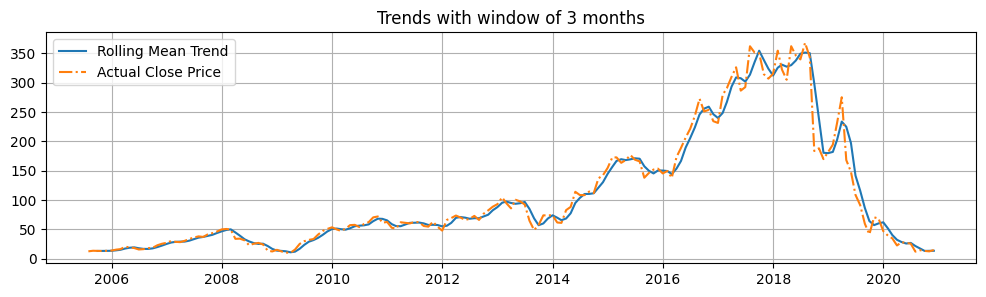

In [47]:
plot_moving_average(stock_df, 3)

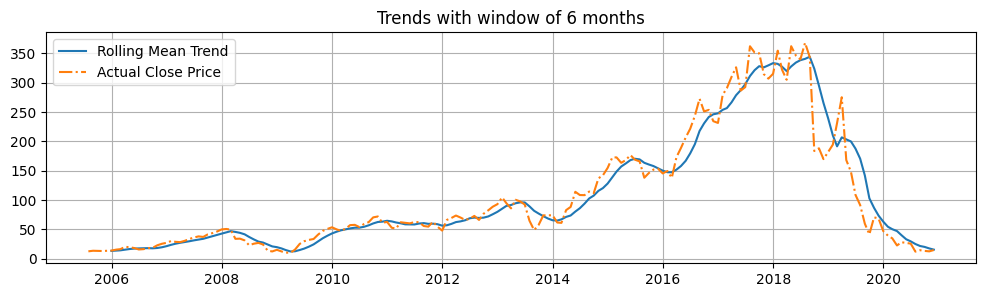

In [48]:
plot_moving_average(stock_df, 6)

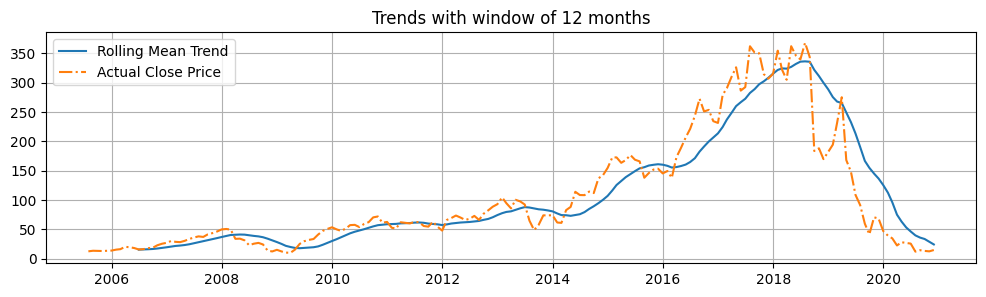

In [49]:
plot_moving_average(stock_df, 12)

Close    7
dtype: int64


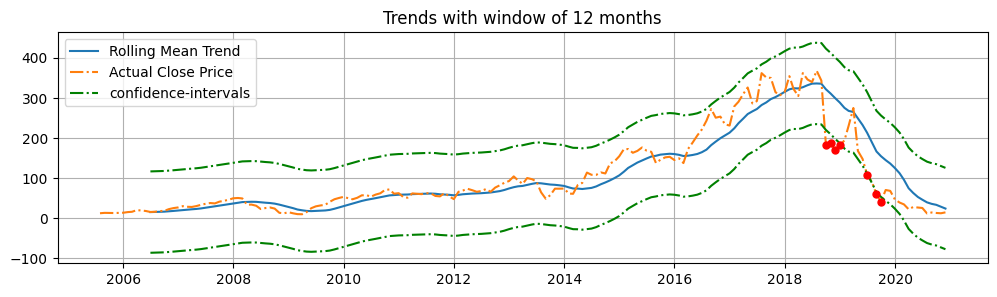

In [50]:
plot_moving_average(stock_df, 12, ci = 1.96, plot_ci = True, plot_anomalies = True)
# plt.savefig("12-trend.png")
# files.download("12-trend.png");

#Anomaly Detection:

In [51]:
# Using Isolation Forest to find the anomalies:
from sklearn.ensemble import IsolationForest

In [52]:
#Fitting isolation forest model to find anomalies in the data:

isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(stock_df['Close'].values.reshape(-1, 1))  
anomaly_df = stock_df.copy()    
anomaly_df['anomaly_score'] = isolation_forest.decision_function(stock_df['Close'].values.reshape(-1, 1))
anomaly_df['outlier'] = isolation_forest.predict(stock_df['Close'].values.reshape(-1, 1))

In [53]:
anomaly_df[anomaly_df['outlier']==-1]

,Close,anomaly_score,outlier
Date,,,
2017-04-30,326.14,-0.001245,-1
2018-07-31,367.90,-0.078729,-1


# Observations:
1. From graph it is evident there was in all increasing trend in the stock prices with dip in 2009 and after that in 2018-2019.
2. After 2016, there was a great rise in the price of the stock.
3.After dip of 2018, the prices increases for a brief period then dipped again till then there has not been a rise as per the data available.
4. Also, there are some instances where the value crosses the confidence interval.


# Do other factors affect the stock prices?

1. As we see in the bivariate analysis of the open & stock prices , we saw a great difference in the values during 3rd quarter of 2018 specifically Sept, 2018
2. Same case in analysis of high & low values of data during this period. 
3. The anomaly detection using confidence intervals also supports this. 
4. Also the Anomaly detection using Isolation Forest marks the month June & July as anomalies.

This was the time during which the founder of YES bank was charged with the corruption charges. Thus, Clearly that factor is somehow deviating the stock price from its trend. 

# Forecasting:

# Evaluation metric:

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
def evaluate(test_predictions, test):
  mape = np.mean(np.abs((test_predictions-test.Close)/test.Close))*100
  return [mean_absolute_error(test_predictions, test['Close']),  mean_squared_error(test_predictions, test['Close']), mape]

In [19]:
def plot(test_predictions, test, train):
  
  #Plotting the results:
  plt.figure(figsize =(12,3),dpi = 100)
  plt.plot(train['Close'],label = 'Train Data')
  plt.plot(test['Close'],label = 'Test Data')
  plt.plot(test_predictions, label = 'Test Predictions')
  plt.legend();

# Model - 1 : Holt winters Double Exponential Smoothing:-- horizon- 12 months.

Through ETS Decomposition, we realise there was some seasonal component in play but the contribution was still meagre, thus trying both double and triple exponential smotthing.

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Text(0.5, 1.0, '12 months Double Exponential Smoothing Forecast')

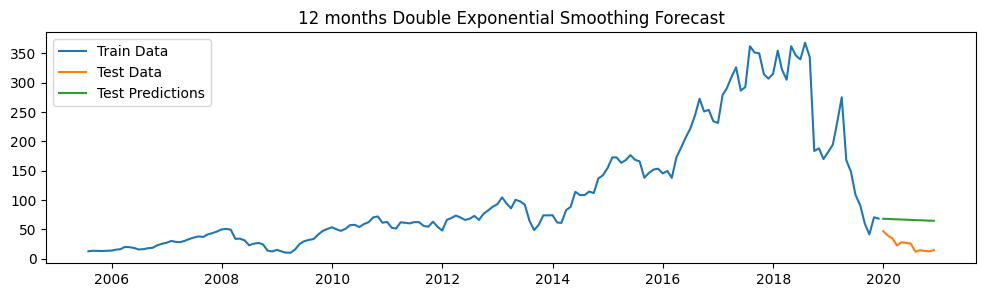

In [21]:
# Double exponential Smoothing model:
train = stock_df.iloc[:-12]
test = stock_df.iloc[-12:]
fitted_model = ExponentialSmoothing(train['Close'],trend='mul').fit()
des_test_predictions = fitted_model.forecast(12)
des_12 = evaluate(des_test_predictions, test)
plot(des_test_predictions,test,train)
plt.title('12 months Double Exponential Smoothing Forecast')
# plt.savefig("des12.png")
# files.download("des12.png")

# Observations:
Clearly through visualisation of test data & predictions, it is evident that Double Exponential Smoothing model is not able to understand the data. The reason could be the greater horizon . Let us try to fit & predict over 6 months of time span. 

# Model - 2 : Holt winters Double Exponential Smoothing:-- horizon- 6 months.

Text(0.5, 1.0, '6 months Double Exponential Smoothing Forecast')

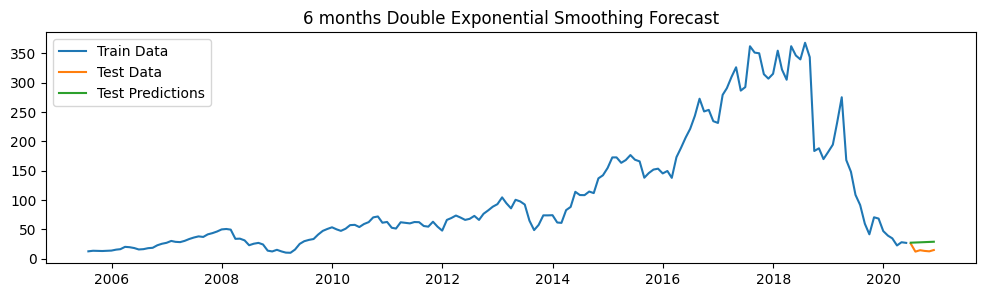

In [22]:
# Double exponential Smoothing model:
train = stock_df.iloc[:-6]
test = stock_df.iloc[-6:]
fitted_model = ExponentialSmoothing(train['Close'],trend='mul').fit()
des_test_predictions = fitted_model.forecast(6)
des_6 = evaluate(des_test_predictions, test)
plot(des_test_predictions,test,train)
plt.title('6 months Double Exponential Smoothing Forecast')

# Observations:
1. The model is working better if data forecast is done for 6 months rather than 12 months.The reason could be absence of peaks in 12 month data.
2.From ETS decomposition it seems there is a seasonal factor too. Let us try fitting Triple Exponential and see if it works well or not.

# Model - 3 : Holt winters Triple Exponential Smoothing:-- horizon- 12 months.

Text(0.5, 1.0, '12 months Triple Exponential Smoothing Forecast')

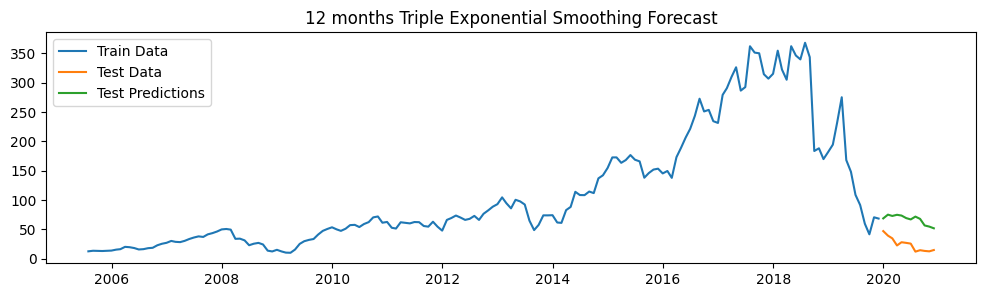

In [60]:
# Triple Exponential smoothing:
train = stock_df.iloc[:-12]
test = stock_df.iloc[-12:]
fitted_model_triple = ExponentialSmoothing(train['Close'],trend='mul',seasonal='mul',seasonal_periods=12,damped = False).fit()
tes_test_predictions = fitted_model_triple.forecast(12)
tes_12 = evaluate(tes_test_predictions, test)
plot(tes_test_predictions,test,train)
plt.title('12 months Triple Exponential Smoothing Forecast')
# plt.savefig("tes12.png")
# files.download("tes12.png")


# Model - 4 : Holt winters Triple Exponential Smoothing:-- horizon- 6 months.

Text(0.5, 1.0, '6 months Triple Exponential Smoothing Forecast')

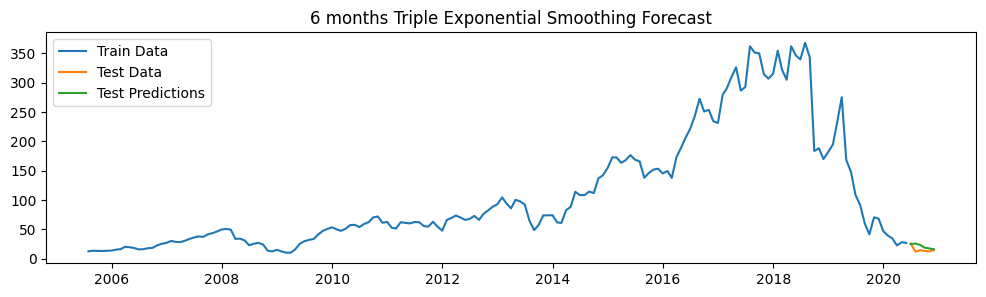

In [61]:
# Triple Exponential smoothing:
train = stock_df.iloc[:-6]
test = stock_df.iloc[-6:]
fitted_model_triple = ExponentialSmoothing(train['Close'],trend='mul',seasonal='mul',seasonal_periods=12,damped = False).fit()
tes_test_predictions = fitted_model_triple.forecast(6)
tes_6 = evaluate(tes_test_predictions, test)
plot(tes_test_predictions,test,train)
plt.title('6 months Triple Exponential Smoothing Forecast')
# plt.savefig("tes6.png")
# files.download("tes6.png")


# Metrics:

In [62]:
eval_df = pd.DataFrame([des_12,des_6,tes_12,tes_6], columns= ['Mean Absolute Error', 'Mean Squared Error','MAPE'], index = ('DES 12', 'DES 6','TES 12', 'TES 6'))

In [63]:
eval_df['RMSE']= np.sqrt(eval_df['Mean Squared Error'])

In [64]:
eval_df

,Mean Absolute Error,Mean Squared Error,MAPE,RMSE
DES 12,42.025403,1867.870581,234.583247,43.218868
DES 6,12.611537,184.197064,94.812660,13.571922
TES 12,42.704058,1911.016224,229.549080,43.715172
TES 6,5.847620,54.560673,45.069230,7.386520


In [65]:
stock_df[-6:].describe()

,Close
count,6.00000
mean,15.36000
std,5.12776
min,11.95000
25%,12.60250
50%,13.76000
75%,14.59500
max,25.60000


# Observation:
Thus, Triple exponential smoothing is able to predict better results with 6 months horizon.

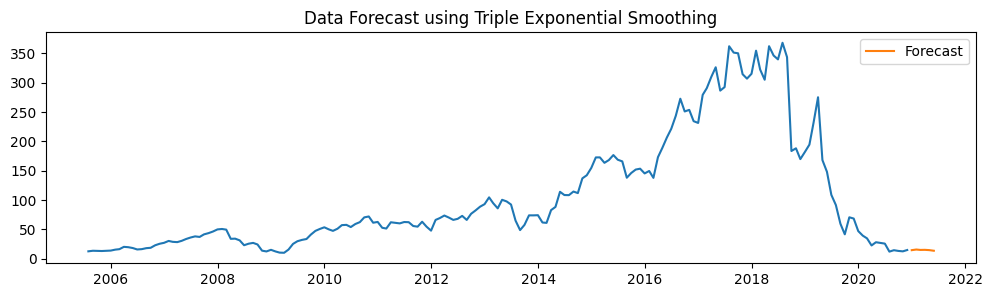

In [66]:
# Final exponential Model 
fitted_model_triple = ExponentialSmoothing(stock_df['Close'],trend='mul',seasonal='mul',seasonal_periods=12,damped = False).fit()
forecast = fitted_model_triple.forecast(6)
plt.figure(figsize = (12,3), dpi = 100)
plt.plot(stock_df.Close)
plt.plot(forecast,label = 'Forecast')
plt.title("Data Forecast using Triple Exponential Smoothing")
plt.legend()
# plt.savefig("tes_forecast.png")
# files.download("tes_forecast.png");

In [67]:
Forecast_df = pd.DataFrame(forecast)
Forecast_df.columns=['Triple Exponential Smoothing']
Forecast_df.head()

,Triple Exponential Smoothing
2020-12-31,14.442219
2021-01-31,15.519550
2021-02-28,14.830434
2021-03-31,14.984271
2021-04-30,14.502813


# Hypothesis: Data is not stationary 



**Stationarity** means the statistical properties of the data like mean, variance and autocorrelation remains constant over time. Many models like MA model, AR model etc. assumes stationarity because if data is not stationary it means its properties are continuously changing, then how can we derive a function which predicts the present value on the basis of past values when the coefficients are changing. 



We will use Augmented Dickey Fuller Test to check for the stationarity of data. 

**Null Hypothesis :** Data is not stationary

**Alternative Hypothesis:**  Data is stationary

# Checking For the stationarity of the time Series using Augmented Dickey Fuller Test

In [68]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [69]:
# Function to create ACF plot, PACF plot and AD-Fuller Result:
def plot_ad_fuller(series, lags= None):
  
  with plt.style.context('bmh'):
    fig = plt.figure(figsize =(12,7), dpi = 100)
    ts_ax = plt.subplot2grid(shape =(2,2),loc= (0,0), colspan = 2)
    pacf_ax = plt.subplot2grid(shape =(2,2),loc= (1,0))
    acf_ax = plt.subplot2grid(shape =(2,2),loc= (1,1))
    
    series.plot(ax= ts_ax)
    plot_pacf(series, ax= pacf_ax)
    plot_acf(series,lags = 30, ax= acf_ax)

    # Calculating p-value:
    p_value= round(adfuller(series)[1],5)
    if p_value > 0.05:
      x= 'Data is not stationary'
    else:
      x= 'Data is stationary'

    # Title:
    ts_ax.set_title('Augmented Dickey Fuller \n p-value = {} \n {}'.format(p_value, x))
    

    plt.tight_layout()

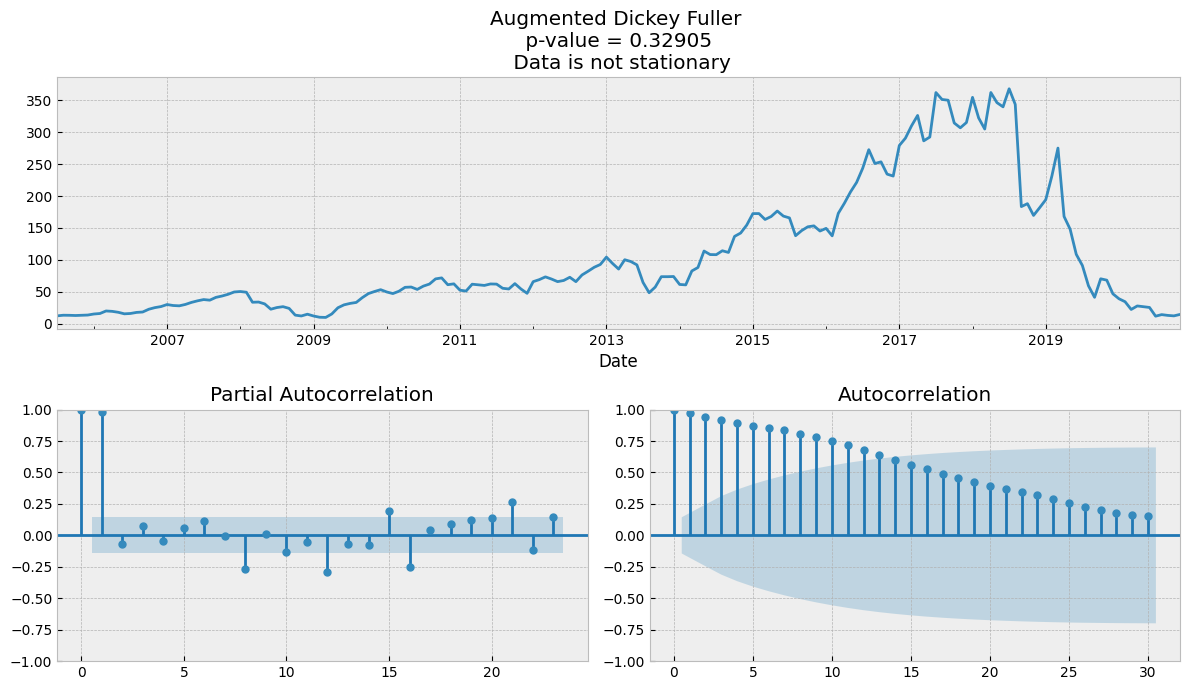

In [70]:
plot_ad_fuller(stock_df.Close)

### Clearly the p-value >0.05. Thus, we fail to reject the null hypotheis. We will try to apply the transformation and see if it becomes stationary.

# Applying first order differentiation

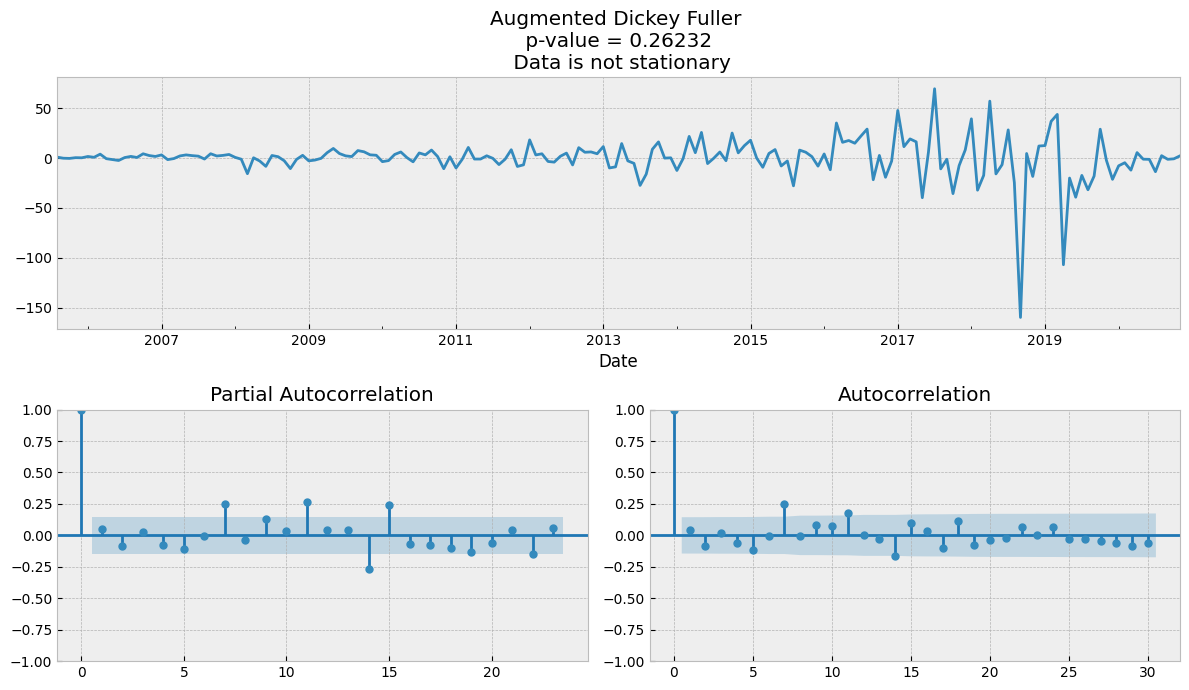

In [71]:
# Differentiating to check if it becomes stationary or not:
plot_ad_fuller(stock_df.Close.diff(1).dropna())

# Observation:
Again the data is not stationary. From the ETS decomposition we found out that there is seasonal factor too. Let us try to apply seasonal differentiation and after check teh stationarity.

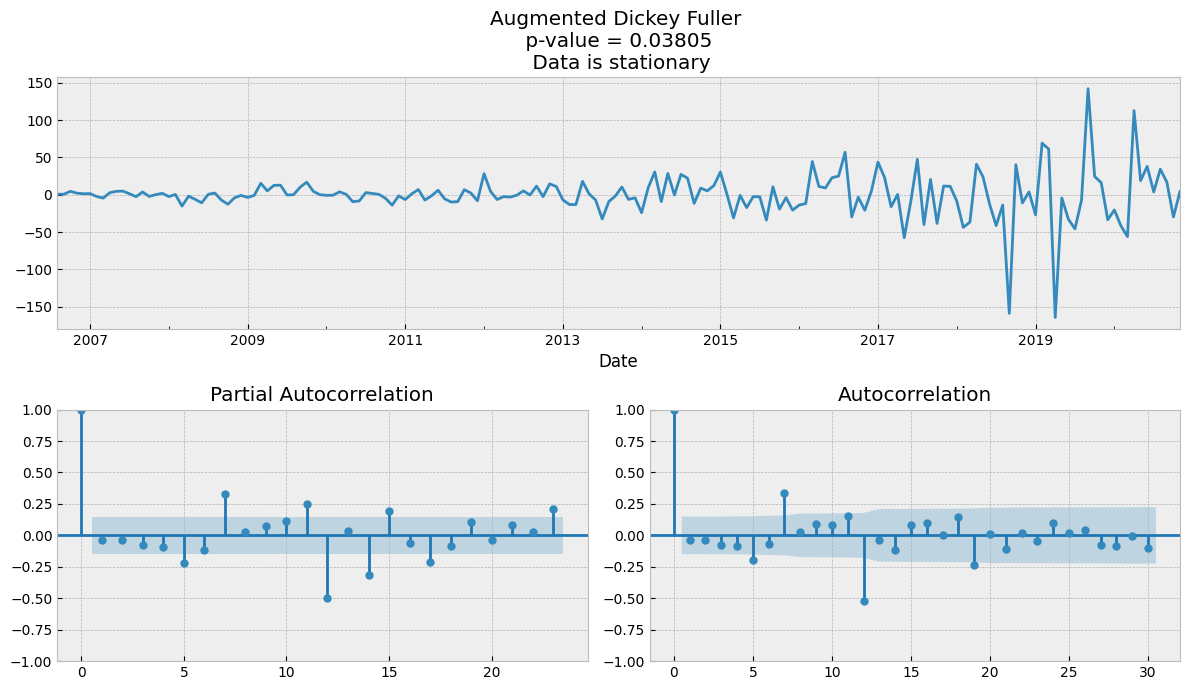

In [72]:
# Removing the seasonal factor:
plot_ad_fuller(stock_df.Close.diff(1).diff(12).dropna())

# Observation:
 Data becomes stationary after 1 differencing and 1 seasonal differencing . Thus, we can apply SARIMA model using d= 1 and D= 1

# Reading ACF & PACF plots:
Since both ACF plots and PACF plots show significant correlated lags. Thus, it is neither only Moving Average Problem  nor only Autoregression Problem.
SARIMA model would be better ML model to predict the data.

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [74]:
from itertools import product
from tqdm import tqdm_notebook

# Defining the range values of SARIMA model parameters:

In [75]:
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 12

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

# Testing for the best parameters among all based upon aic score.

AIC - The AIC estimates the quality of a model relative to other models. This is why it is used for model selection. Given that there will be some information lost when a model is fit to the data, the AIC quantifies the relative amount of information lost by the model. Therefore, the less information lost, the better the model. Consequently, a lower AIC value translates into a better model. Specifically, the AIC is a function of the number of estimated parameters k and the maximum value of the likelihood function for the model 𝐿
AIC=2k-2 ln(𝐿)


In [76]:
def optimizeSARIMA(df, parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model= SARIMAX(df, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
 
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [77]:
train_df = stock_df[:-6]
test_df = stock_df[-6:]

In [78]:
result_table = optimizeSARIMA(train_df.Close, parameters_list, d, D, s)

  0%|          | 0/36 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

In [79]:
result_table

,parameters,aic
0,"(4, 3, 0, 1)",1507.066376
1,"(3, 3, 1, 1)",1508.005911
2,"(4, 3, 1, 1)",1511.175937
3,"(4, 2, 1, 1)",1512.245925
4,"(4, 2, 0, 1)",1512.329706
5,"(2, 4, 0, 1)",1512.904858
6,"(2, 2, 1, 1)",1513.576010
7,"(2, 2, 0, 1)",1513.820103
8,"(4, 4, 0, 1)",1514.195752
9,"(3, 4, 0, 1)",1514.917757


In [80]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=SARIMAX(train_df.Close, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  179
Model:             SARIMAX(4, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -744.533
Date:                              Fri, 02 Jun 2023   AIC                           1507.066
Time:                                      11:02:27   BIC                           1535.074
Sample:                                  07-31-2005   HQIC                          1518.435
                                       - 05-31-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8819      0.120      7.339      0.000       0.646       1.117
ar.L2          0.50

# Residual Analysis:
AIC is a comparison tool. So, we are just comparing the values fitted on our given order. But what if the order we provided are all not good? That’s why we do residual analysis.

Ideally, the residuals look like white noise, as it would mean that any difference between the predicted values and actual values are due to randomness. Therefore, the residuals must be uncorrelated and independently distributed. We can assess those properties by studying the Q-Q plot and running the Ljung-Box test .If the analysis leads us to conclude that the residuals are completely random, then we have a model ready for forecasting. Otherwise, we must try a different set of values for p and q, and start the process over.


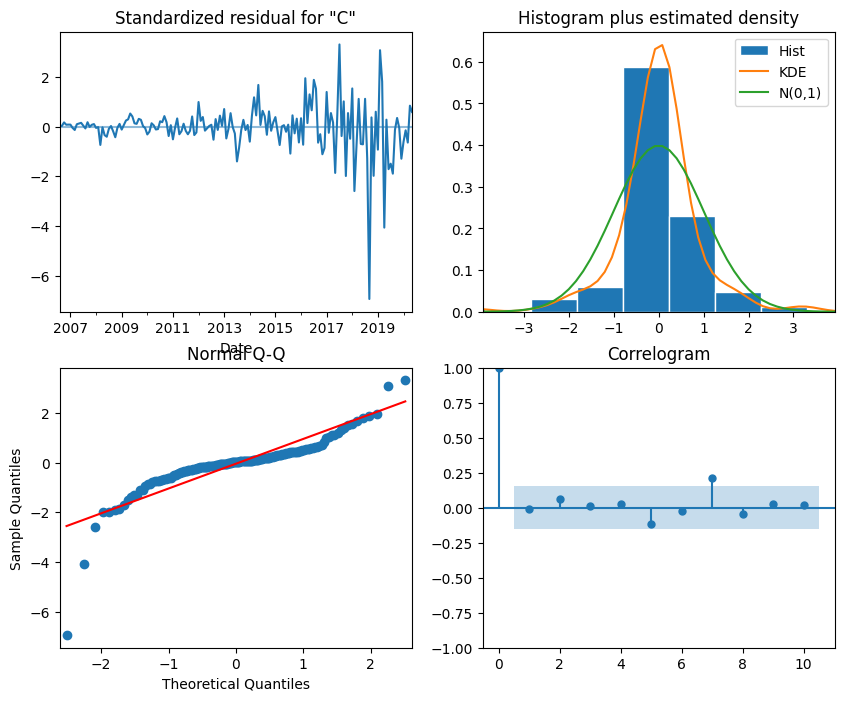

In [81]:
best_model.plot_diagnostics(figsize= (10,8));

## Why Q-Q plot?
Q-Q plot or Quantile-Quantile plot is a graphical tool to verify our hypothesis that the model’s residuals are normally distributed. The Q-Q plot is constructed by plotting the quantiles of our residuals on the y-axis, against the quantiles of a theoretical distribution, in this case the normal distribution, on the x-axis. This results in a scatter plot.If both distributions are similar, meaning that the distribution of the residuals is close to a normal distribution, then the Q-Q plot will display a straight line that approximately lies on y = x.
On the other hand, the Q-Q plot of residuals that are not close to a normal distribution will generate a curve that departs from y = x


# Ljung-Box Test
The Ljung-Box test is a statistical test that tests if the autocorrelation of a group of data is significantly different from 0. In our case, we apply the Ljung-Box test to the model’s residuals to assess if they are correlated or not. The null hypothesis states that the data is independently distributed, meaning that there is no autocorrelation.  So, we want p-value to be greater than 0.05 to accept the null hypothesis that residuals are independently distributed and hence white noise only. 


In [82]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = best_model.resid
lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))
print(pvalue)

lb_pvalue


The returned p-values are all greater than 0.05. Thus, we fail to reject null hypothesis and thus residuals are not correlated.

## Predictions:

In [83]:
sarima_predictions = best_model.predict(len(train_df), len(train_df)+5)

In [84]:
test_df

,Close
Date,
2020-06-30,25.60
2020-07-31,11.95
2020-08-31,14.37
2020-09-30,13.15
2020-10-31,12.42
2020-11-30,14.67


In [85]:
evaluate(sarima_predictions,test_df)

[24.609512564804152, 815.075854940504, 173.41789009442746]

In [86]:
# Comparing the scores by SARIMA model with TES score:
eval_df

,Mean Absolute Error,Mean Squared Error,MAPE,RMSE
DES 12,42.025403,1867.870581,234.583247,43.218868
DES 6,12.611537,184.197064,94.812660,13.571922
TES 12,42.704058,1911.016224,229.549080,43.715172
TES 6,5.847620,54.560673,45.069230,7.386520


# Clearly, Triple Exponential Smoothing model is working far better than SARIMA model.
Thus, our final forecast is given by forecast_df and Final model is triple Exponential Smoothing.

In [87]:
Forecast_df

,Triple Exponential Smoothing
2020-12-31,14.442219
2021-01-31,15.519550
2021-02-28,14.830434
2021-03-31,14.984271
2021-04-30,14.502813
2021-05-31,13.440940


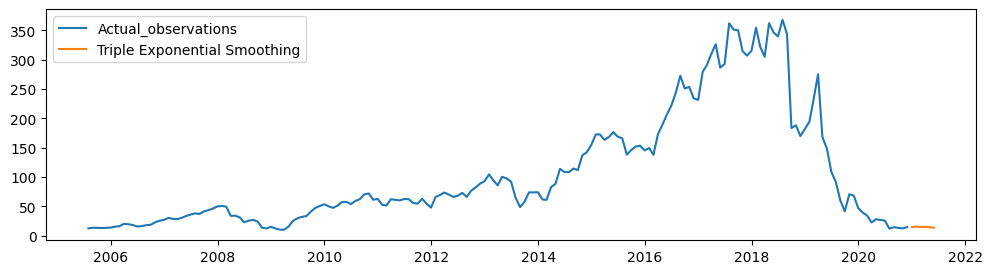

In [88]:
plt.figure(figsize = (12,3),dpi = 100)
plt.plot(stock_df, label = 'Actual_observations')
plt.plot(Forecast_df['Triple Exponential Smoothing'], label = 'Triple Exponential Smoothing')
plt.legend();

# Conclusion:
Clearly, the stock prices of the bank was influenced by the news of its founder being involved in the scam. Thus, not able to correctly predict the patterns as per Machine Learning models. Statistical models work far better.

In [101]:
import pkg_resources

# List of imported packages
imported_packages = ['numpy', 'matplotlib', 'seaborn','pandas','statsmodels','sklearn','tqdm']  # Replace with the packages you have imported

with open('requirements.txt', 'w') as file:
    for package in imported_packages:
        try:
            distribution = pkg_resources.get_distribution(package)
            file.write('{}=={}\n'.format(distribution.key, distribution.version))
        except pkg_resources.DistributionNotFound:
            print('Package {} is not installed.'.format(package))

In [102]:
from joblib import dump
dump(fitted_model_triple, 'model.joblib')

['model.joblib']